In [36]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset
# 指定文件路径
file_path = '附件一（训练集）.xlsx'

In [37]:
df1 = pd.read_excel(file_path, sheet_name='材料1')
df2 = pd.read_excel(file_path, sheet_name='材料2')
df3 = pd.read_excel(file_path, sheet_name='材料3')
df4 = pd.read_excel(file_path, sheet_name='材料4')
last_1024_columns = df1.iloc[:, -1024:]
df1['B'] = last_1024_columns.max(axis=1)
last_1024_columns = df2.iloc[:, -1024:]
df2['B'] = last_1024_columns.max(axis=1)
last_1024_columns = df3.iloc[:, -1024:]
df3['B'] = last_1024_columns.max(axis=1)
last_1024_columns = df4.iloc[:, -1024:]
df4['B'] = last_1024_columns.max(axis=1)
df1['材料']=0
df2['材料']=1
df3['材料']=2
df4['材料']=3
df2.columns=df1.columns
df3.columns=df1.columns
df4.columns=df1.columns
df=pd.concat([df1,df2,df3,df4],axis=0)
# df=df.iloc[:,:1028]
df

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1016,1017,1018,1019,1020,1021,1022,1023,B,材料
0,25,50030,1997.955250,正弦波,0.000213,0.000389,0.000566,0.000743,0.000919,0.001096,...,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036,0.028849,0
1,25,50020,2427.749830,正弦波,-0.000551,-0.000358,-0.000165,0.000028,0.000221,0.000413,...,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744,0.031419,0
2,25,50020,3332.725760,正弦波,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,-0.002704,...,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995,0.035535,0
3,25,50020,4502.908007,正弦波,-0.000511,-0.000267,-0.000023,0.000222,0.000466,0.000711,...,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756,0.040015,0
4,25,50030,6063.023248,正弦波,0.000458,0.000732,0.001007,0.001281,0.001555,0.001830,...,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183,0.045028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,90,199190,20604.900210,梯形波,-0.017758,-0.017339,-0.016932,-0.016534,-0.016140,-0.015745,...,-0.019854,-0.019692,-0.019528,-0.019356,-0.019157,-0.018903,-0.018573,-0.018180,0.034867,3
2796,90,199190,26504.284280,梯形波,-0.019690,-0.019227,-0.018776,-0.018334,-0.017895,-0.017456,...,-0.022062,-0.021886,-0.021706,-0.021513,-0.021285,-0.020987,-0.020605,-0.020159,0.038341,3
2797,90,199190,46232.491530,梯形波,-0.024998,-0.024411,-0.023838,-0.023278,-0.022722,-0.022165,...,-0.027966,-0.027739,-0.027509,-0.027266,-0.026981,-0.026614,-0.026142,-0.025587,0.048877,3
2798,90,199190,61458.085900,梯形波,-0.027988,-0.027329,-0.026687,-0.026060,-0.025438,-0.024816,...,-0.031314,-0.031056,-0.030793,-0.030516,-0.030196,-0.029787,-0.029264,-0.028647,0.054889,3


In [38]:
df=df[['磁芯损耗，w/m3','温度，oC','励磁波形','B','频率，Hz','材料']]
df

,磁芯损耗，w/m3,温度，oC,励磁波形,B,频率，Hz,材料
0,1997.955250,25,正弦波,0.028849,50030,0
1,2427.749830,25,正弦波,0.031419,50020,0
2,3332.725760,25,正弦波,0.035535,50020,0
3,4502.908007,25,正弦波,0.040015,50020,0
4,6063.023248,25,正弦波,0.045028,50030,0
...,...,...,...,...,...,...
2795,20604.900210,90,梯形波,0.034867,199190,3
2796,26504.284280,90,梯形波,0.038341,199190,3
2797,46232.491530,90,梯形波,0.048877,199190,3
2798,61458.085900,90,梯形波,0.054889,199190,3


In [39]:
df['S'] = df['励磁波形'].map({'正弦波': 0,'三角波':1,'梯形波':2})
df_encoded=df

C:\Users\74860\AppData\Local\Temp\ipykernel_30944\2496952686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S'] = df['励磁波形'].map({'正弦波': 0,'三角波':1,'梯形波':2})


In [40]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
df=df.reset_index(drop=True)
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[['励磁波形','材料']])

# 将编码后的特征转换为DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['励磁波形','材料']))
encoded_df.reset_index(drop=True)
# 合并原始数据框和编码后的数据框
df_encoded = pd.concat([df, encoded_df], axis=1)

# 对磁芯损耗和温度取对数
df_encoded['磁芯损耗，w/m3'] = np.log(df_encoded['磁芯损耗，w/m3'])
df_encoded['频率，Hz'] = np.log(df_encoded['频率，Hz'])
df_encoded['温度，oC'] = np.log(df_encoded['温度，oC'])
df_encoded.drop(['励磁波形','材料','材料_0','S','励磁波形_三角波'],axis=1,inplace=True)
# df_encoded
df=df_encoded
df=df.iloc[:,:]
df

,磁芯损耗，w/m3,温度，oC,B,频率，Hz,励磁波形_梯形波,励磁波形_正弦波,材料_1,材料_2,材料_3
0,7.599880,3.218876,0.028849,10.820378,0.0,1.0,0.0,0.0,0.0
1,7.794720,3.218876,0.031419,10.820178,0.0,1.0,0.0,0.0,0.0
2,8.111546,3.218876,0.035535,10.820178,0.0,1.0,0.0,0.0,0.0
3,8.412479,3.218876,0.040015,10.820178,0.0,1.0,0.0,0.0,0.0
4,8.709964,3.218876,0.045028,10.820378,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
12395,9.933284,4.499810,0.034867,12.202014,1.0,0.0,0.0,0.0,1.0
12396,10.185062,4.499810,0.038341,12.202014,1.0,0.0,0.0,0.0,1.0
12397,10.741438,4.499810,0.048877,12.202014,1.0,0.0,0.0,0.0,1.0
12398,11.026111,4.499810,0.054889,12.202014,1.0,0.0,0.0,0.0,1.0


In [41]:
import statsmodels.api as sm
X=df.iloc[:,1:]
y=df.iloc[:,0]
# 添加常数项，因为OLS模型默认不包括截距
# X = sm.add_constant(X)

# 拟合OLS模型
model = sm.OLS(y, X).fit()

# 打印模型的摘要
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              磁芯损耗，w/m3   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.332e+05
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                        0.00
Time:                        00:16:11   Log-Likelihood:                         -16069.
No. Observations:               12400   AIC:                                  3.215e+04
Df Residuals:                   12392   BIC:                                  3.221e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
X=X.values
y=y.values
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.00000001, random_state=42)
if torch.cuda.is_available():
    train_dataset = TensorDataset(X_train.to('cuda:0'), y_train.to('cuda:0'))
    test_dataset = TensorDataset(X_test.to('cuda:0'), y_test.to('cuda:0'))

# 创建一个字典来存储数据集
dataset = {
    'train_input': train_dataset.tensors[0],
    'test_input': test_dataset.tensors[0],
    'train_label': train_dataset.tensors[1],
    'test_label':test_dataset.tensors[1]
}
dataset

{'train_input': tensor([[ 3.2189,  0.0274, 11.8586,  ...,  0.0000,  0.0000,  0.0000],
         [ 3.2189,  0.3083, 11.5120,  ...,  1.0000,  0.0000,  0.0000],
         [ 3.9120,  0.0548, 12.8912,  ...,  0.0000,  0.0000,  1.0000],
         ...,
         [ 4.4998,  0.3102, 11.2838,  ...,  1.0000,  0.0000,  0.0000],
         [ 4.4998,  0.0871, 11.2830,  ...,  0.0000,  0.0000,  0.0000],
         [ 3.2189,  0.0631, 11.5124,  ...,  0.0000,  1.0000,  0.0000]],
        device='cuda:0', dtype=torch.float32),
 'test_input': tensor([[ 3.2189,  0.0219, 12.7788,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
        device='cuda:0', dtype=torch.float32),
 'train_label': tensor([[ 9.3969],
         [14.3784],
         [12.3012],
         ...,
         [13.5052],
         [ 9.7533],
         [10.8482]], device='cuda:0', dtype=torch.float32),
 'test_label': tensor([[9.6185]], device='cuda:0', dtype=torch.float32)}

In [50]:
import torch
torch.set_default_dtype(torch.float64) # 设置默认张量数据类型为双精度浮点数
torch.manual_seed(33) # 设置随机数种子为33
from kan import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 创建一个KAN模型：
# 输入维度为2，输出维度为1，隐藏层有5个神经元
# 使用三次样条（k=3），将输入空间划分为5个网格间隔（grid=5）
# 设置随机数种子为0
model = KAN(width=[8,1], grid=5, k=3, seed=0,device=device)

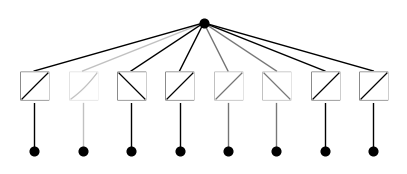

In [51]:
# 绘制初始化时的KAN模型图形
model(dataset['train_input']);
# 使用 plot 方法绘制模型的输出结果
# 设置 beta 参数为 100，用于控制平滑度
model.plot(beta=100)

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]c:\Users\74860\Desktop\deep learning\kanmodel\kan\KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
train loss: 3.69e-01 | test loss: 7.79e-01 | reg: 1.67e+01 : 100%|██| 20/20 [00:04<00:00,  4.18it/s]


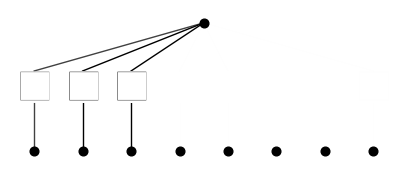

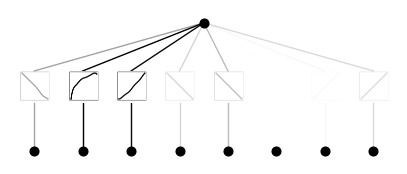

In [52]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

In [53]:
# 设置 mode 变量为 "auto" 或 "manual"，以确定激活函数的设置方式
mode = "manual"  # 或者 mode = "manual"
# 如果 mode 是 "manual"，则手动设置激活函数为符号函数
if mode == "manual":
    # 手动模式下，逐个指定隐藏层和输入层的激活函数
    # 第一个参数表示层的索引，第二个和第三个参数表示神经元的索引
    # 第四个参数为要设置的激活函数，例如 'sin', 'x^2', 'exp' 等
    model.fix_symbolic(0,0,0,'x'); # 设置第一个隐藏层的第一个神经元的激活函数为正弦函数
    model.fix_symbolic(0,1,0,'log'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,2,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,3,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,4,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,5,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,6,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,7,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    # model.fix_symbolic(1,0,0,'x'); # 设置输出层的第一个神经元的激活函数为指数函数
# 如果 mode 是 "auto"，则自动设置激活函数为符号函数
elif mode == "auto":
    # 自动模式下，根据提供的激活函数库自动选择合适的符号函数作为激活函数
    lib = ['x','log']
    model.auto_symbolic(lib=lib)

Best value at boundary.
r2 is 0.9934826125420159
r2 is 0.9973976157934461
r2 is 0.9898520221683922
Best value at boundary.
r2 is 0.9999999999962007
Best value at boundary.
r2 is 0.9999999999982474
Best value at boundary.
r2 is 0.9999999710097772
Best value at boundary.
r2 is 0.9999999998425502
Best value at boundary.
r2 is 0.9999999999956253


In [54]:
model.symbolic_formula()[0][0] # 获取模型的符号化公式

-0.38*x_1 + 1.73*x_3 - 0.21*x_4 - 0.28*x_5 + 0.03*x_7 + 0.22*x_8 + 2.39*log(5.41*x_2) - 5.5

In [55]:
formula = model.symbolic_formula()[0][0]
prediction = []
 
def acc(formula, X):
    batch = X.shape[0]  # 获取批量大小
    for i in range(batch):
        subs_dict = {
            'x_1': X[i, 0],
            'x_2': X[i, 1],
            'x_3': X[i, 2],
            'x_4': X[i, 3],
            'x_5': X[i, 4],
            'x_6': X[i, 5],
            'x_7': X[i, 6],
            'x_8': X[i, 7],
            #'x_9': X[i, 8]
        }
        # 使用给定的公式对当前样本进行预测，并将结果转换为浮点数
        predict = float(formula.subs(subs_dict))
        prediction.append(predict)  # 将预测结果添加到列表中   
    return prediction
 
test_pred = acc(formula, dataset['train_input'])
 
y_test_h =y_train
pred_test_h = test_pred
mse = ((np.exp(y_test_h) - np.exp(pred_test_h)) ** 2).mean()
mse


tensor(3.3986e+11)

In [56]:
# df['ypred']=1.19*np.log(-0.8*df['温度，oC']+6.2)+2.35*np.log(7*df['B'])-6.41*np.log(-0.59*df['频率，Hz']+9.3)-0.18*df['励磁波形_梯形波']-0.24*df['励磁波形_正弦波']-0.03*df['材料_1']+0.2*df['材料_3']+16.83
df['ypred']=-0.38*df['温度，oC']+2.39*np.log(5.41*df['B'])+1.73*df['频率，Hz']-0.21*df['励磁波形_梯形波']-0.28*df['励磁波形_正弦波']+0.03*df['材料_2']+0.22*df['材料_3']-5.5
mse = ((np.exp(df['磁芯损耗，w/m3']) - np.exp(df['ypred'])) ** 2).mean()
mse

21889405766.58159

In [19]:
X = df[['频率，Hz', 'B']]
y=df['磁芯损耗，w/m3']
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              磁芯损耗，w/m3   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 2.227e+04
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:57:21   Log-Likelihood:                -16100.
No. Observations:               12400   AIC:                         3.221e+04
Df Residuals:                   12397   BIC:                         3.223e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8664      0.164    -53.951      0.0

In [20]:
df['ypred']=-8.8664+1.4634*df['频率，Hz']+26.8678*df['B']
mse = ((np.exp(df['磁芯损耗，w/m3']) - np.exp(df['ypred'])) ** 2).mean()
mse

C:\Users\74860\AppData\Local\Temp\ipykernel_22532\347221775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ypred']=-8.8664+1.4634*df['频率，Hz']+26.8678*df['B']


2079646789232.8206